In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
#DATA LOADING

In [3]:
mail = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
mail

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
#sms.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
mail.dropna(how="any", inplace=True, axis=1)
mail.columns = ['label', 'message']
mail

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
#Exploratory Data Analysis (EDA)

In [7]:
mail.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
mail.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
mail['label_num'] = mail.label.map({'ham':0, 'spam':1})
mail

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [10]:
mail['message_len'] = mail.message.apply(len)
mail

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


Text(0.5, 0, 'Message Length')

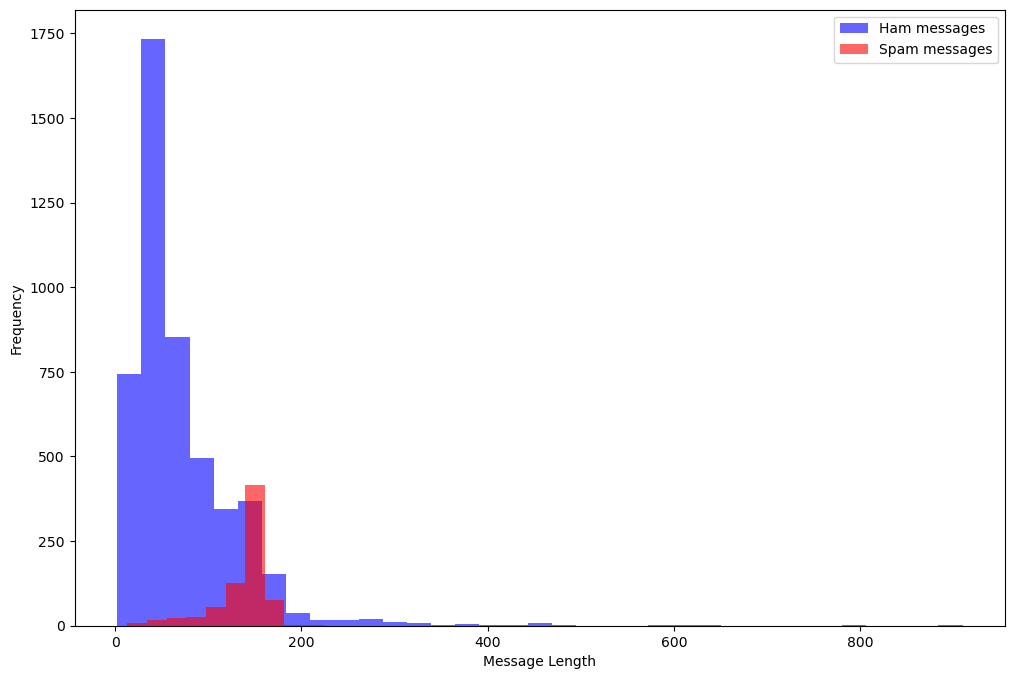

In [11]:
plt.figure(figsize=(12, 8))

mail[mail.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
mail[mail.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [12]:
mail[mail.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [13]:
mail[mail.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [14]:
mail[mail.message_len == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [15]:
#TEXT PreProcessing

In [16]:
# Initialize the stemmer and stopwords
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Remove Mentions
    text = re.sub(r'@\S+', '', text)
    # Remove Hashtags
    text = re.sub(r'#\S+', '', text)
    # Remove stopwords and stem the words
    words = [stemmer.stem(w) for w in text.split() if w not in stopwords]
    # Join the words back into a string
    cleaned_text = ' '.join(words)
    return text

In [17]:
mail['clean_msg'] = mail.message.apply(clean_text)

mail

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go until jurong point crazy available only ...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry in a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah i don t think he goes to usf he lives aro...
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,this is the nd time we have tried contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity was in mood for that so any other s...
5570,ham,The guy did some bitching but I acted like i'd...,0,125,the guy did some bitching but i acted like i d...


In [18]:

words = mail[mail.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('i', 2948), ('you', 1944), ('to', 1554), ('the', 1126), ('a', 1060), ('u', 1026), ('and', 857), ('in', 820), ('me', 772), ('my', 750), ('is', 732), ('it', 713), ('that', 558), ('of', 525), ('for', 501), ('s', 490), ('have', 440), ('can', 440), ('so', 435), ('but', 434), ('your', 417), ('not', 415), ('are', 414), ('m', 412), ('t', 393), ('on', 393), ('do', 384), ('at', 378), ('we', 355), ('if', 354), ('will', 341), ('be', 335), ('gt', 318), ('lt', 316), ('get', 311), ('how', 304), ('now', 300), ('no', 298), ('just', 293), ('ok', 287), ('when', 287), ('up', 287), ('what', 273), ('with', 272), ('ll', 265), ('go', 253), ('this', 252), ('all', 245), ('ur', 241), ('know', 236)]


In [19]:
words = mail[mail.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('to', 688), ('a', 391), ('call', 370), ('you', 299), ('your', 264), ('free', 228), ('the', 206), ('for', 204), ('now', 203), ('or', 192), ('u', 186), ('p', 180), ('txt', 170), ('is', 158), ('on', 144), ('ur', 144), ('have', 135), ('mobile', 129), ('from', 128), ('text', 126), ('stop', 126), ('and', 122), ('claim', 113), ('with', 109), ('reply', 104), ('t', 99), ('s', 99), ('www', 98), ('of', 97), ('prize', 93), ('this', 89), ('get', 86), ('our', 85), ('only', 84), ('in', 82), ('are', 80), ('just', 78), ('no', 76), ('cash', 76), ('won', 76), ('uk', 74), ('win', 72), ('nokia', 71), ('i', 70), ('send', 70), ('new', 69), ('c', 63), ('urgent', 63), ('week', 60), ('out', 60)]


In [20]:
#SplitDATA and Vectorize

In [21]:
# split X and y into training and testing sets 

X = mail.clean_msg
y = mail.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(5572,)
(4179,)
(1393,)
(4179,)
(1393,)


In [22]:
# instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.fit_transform(X_train)

# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4179, 6664)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 6664)


In [23]:
#Building and evaluating the model

In [24]:
SVM = SVC()

In [25]:
SVM.fit(X_train_dtm, y_train)

SVC()

In [26]:
# make class predictions for X_test_dtm
y_pred_class = SVM.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred_class)

=======Accuracy Score===========
0.9849246231155779
=======Confision Matrix===========


array([[1212,    1],
       [  20,  160]], dtype=int64)

In [27]:
KN = KNeighborsClassifier()

In [28]:
KN.fit(X_train_dtm, y_train)

KNeighborsClassifier()

In [29]:
y_pred_class = KN.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))


=======Accuracy Score===========
0.9296482412060302
=======Confision Matrix===========
[[1212    1]
 [  97   83]]


In [30]:
DT = DecisionTreeClassifier()

In [31]:
DT.fit(X_train_dtm, y_train)

DecisionTreeClassifier()

In [32]:
y_pred_class = DT.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))


=======Accuracy Score===========
0.968413496051687
=======Confision Matrix===========
[[1189   24]
 [  20  160]]


In [33]:
#Comparing the models

In [34]:
# Classifiers
names = [
    "KNN Classifier",
    "Decision Tree",
    "SVM",  
]

models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    
]

In [35]:
def score(X_train, y_train, X_test, y_test, names, models):
    score_df = pd.DataFrame()
    score_train = []
    confusion_matrices = []
    
    for name, model in zip(names, models):
        model.fit(X_train, y_train)
        y_pred_class = model.predict(X_test)
        score_train.append(metrics.accuracy_score(y_test, y_pred_class))
        confusion_matrices.append(metrics.confusion_matrix(y_test, y_pred_class))
    
    score_df["Classifier"] = names
    score_df["Training accuracy"] = score_train
    score_df["Confusion matrix"] = confusion_matrices
    score_df.sort_values(by='Training accuracy', ascending=False, inplace=True)
    
    return score_df

In [36]:
score(X_train_dtm, y_train, X_test_dtm, y_test, names=names, models=models)


,Classifier,Training accuracy,Confusion matrix
2,SVM,0.984925,"[[1212, 1], [20, 160]]"
1,Decision Tree,0.965542,"[[1185, 28], [20, 160]]"
0,KNN Classifier,0.929648,"[[1212, 1], [97, 83]]"


In [37]:
#Test the models

In [40]:
def classify_email(email):
    cleaned_email = clean_text(email)
    email_dtm = vect.transform([cleaned_email])
    prediction = SVM.predict(email_dtm)
    if prediction[0] == 0:
        return 'DT : ham'
    else:
        return 'DT : spam'

In [41]:
email = "Hello, this is a legitimate email."
classification = classify_email(email)
print(classification)  # Output: ham

email = "Congratulations! You have won a prize. Click here to win it for free."
classification = classify_email(email)
print(classification)

DT : ham
DT : spam
